In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
kid_iq=pd.read_csv('kid_iq.csv')
kid_iq.head()

,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,1,65,1,121.117529,4,27
1,2,98,1,89.361882,4,25
2,3,85,1,115.443165,4,27
3,4,83,1,99.449639,3,25
4,5,115,1,92.745710,4,27


In [3]:
kid_iq_1=kid_iq.drop('Unnamed: 0',axis='columns')
kid_iq_1.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


In [4]:
kid_iq_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  434 non-null    int64  
 1   mom_hs     434 non-null    int64  
 2   mom_iq     434 non-null    float64
 3   mom_work   434 non-null    int64  
 4   mom_age    434 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB


#### No null values present

#### Basic descriptive statistics from the data

In [5]:
kid_iq_1.describe()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000,2.896313,22.785714
std,20.410688,0.410799,15.000000,1.181394,2.701070
min,20.000000,0.000000,71.037405,1.000000,17.000000
25%,74.000000,1.000000,88.660321,2.000000,21.000000
50%,90.000000,1.000000,97.915254,3.000000,23.000000
75%,102.000000,1.000000,110.272742,4.000000,25.000000
max,144.000000,1.000000,138.893106,4.000000,29.000000


#### How many Mother's have completed the hs grad?

In [6]:
kid_iq_1.mom_hs.value_counts()

mom_hs
1    341
0     93
Name: count, dtype: int64

#### 343 mother's have HS qualification while 93 doesn't

In [7]:
kid_iq_1.groupby('mom_hs')['kid_score'].describe()

,count,mean,std,min,25%,50%,75%,max
mom_hs,,,,,,,,
0,93.0,77.548387,22.573800,20.0,58.0,80.0,95.0,136.0
1,341.0,89.319648,19.049483,38.0,77.0,92.0,103.0,144.0


#### Mother's with HS qualification seems to have kid with slightly better IQ's.

In [8]:
kid_iq_1.mom_work.value_counts()

mom_work
4    205
2     96
1     77
3     56
Name: count, dtype: int64

In [9]:
kid_iq_1.groupby('mom_work')['kid_score'].describe()

,count,mean,std,min,25%,50%,75%,max
mom_work,,,,,,,,
1,77.0,82.000000,21.704353,40.0,67.0,86.0,97.0,126.0
2,96.0,85.854167,21.722644,20.0,73.0,90.0,100.0,136.0
3,56.0,93.500000,16.339578,54.0,84.5,96.0,104.0,144.0
4,205.0,87.209756,19.884961,38.0,75.0,89.0,102.0,136.0


#### Mother's job does not seem to have too much impact on their children's IQ. Although category 3 have greater IQ's than all the other categories. Since not much information cannot be found on the job categories, it simply cannot be decided of which factors of the job can impact a kid's IQ.

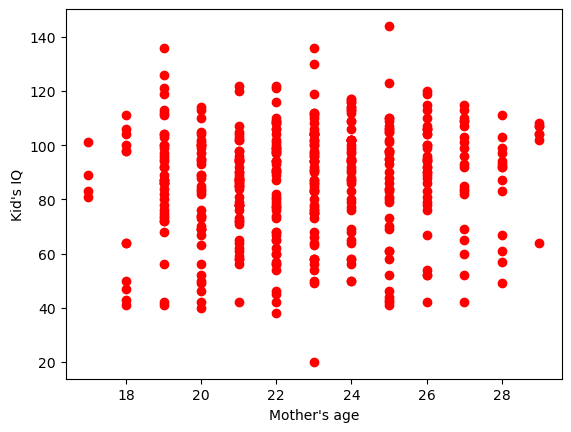

In [10]:
plt.scatter('mom_age','kid_score',data=kid_iq_1,c='red')
plt.xlabel("Mother's age")
plt.ylabel("Kid's IQ")
plt.show()

In [11]:
grouped_by_age=kid_iq_1.copy()

In [12]:
bins=[17,20,22,25,27,30]
labels=['17-20','20-22','22-25','25-27','27-30']
grouped_by_age['age_bins']=pd.cut(grouped_by_age['mom_age'],bins=bins,labels=labels,right=False)
grouped_by_age.groupby('age_bins')['kid_score'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bins,,,,,,,,
17-20,56.0,87.053571,21.876031,41.0,74.75,88.0,100.25,136.0
20-22,92.0,83.119565,18.256922,40.0,71.75,86.0,95.25,122.0
22-25,168.0,87.541667,20.461693,20.0,75.00,91.0,102.00,136.0
25-27,76.0,88.039474,21.957195,41.0,78.75,92.5,104.25,144.0
27-30,42.0,89.285714,19.715397,42.0,82.25,93.5,104.00,115.0


#### Mother's age does not interpret any significant changes on the kid's IQ if the age is less than 18 or greater than 28. Althogh it is somewhat advisable to the mothers be giving birth in the late 20's.

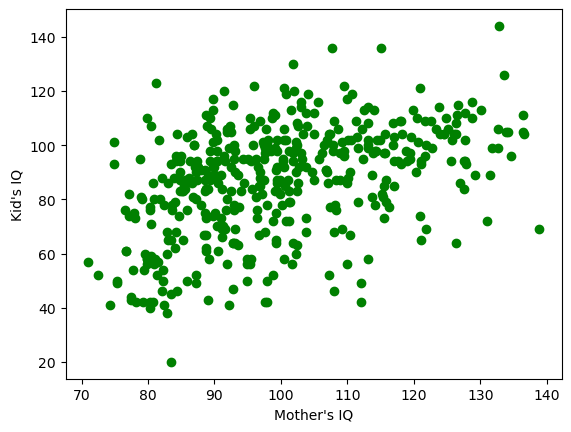

In [13]:
plt.scatter('mom_iq','kid_score',data=kid_iq_1,c='green')
plt.xlabel("Mother's IQ")
plt.ylabel("Kid's IQ")
plt.show()

#### Mother's IQ is a potential indicator of high IQ of their kids since we can clearly see a linear positive trend as the IQ increases.

#### Let's check the distribution of the Kid's IQ score.

<Axes: xlabel='kid_score', ylabel='Count'>

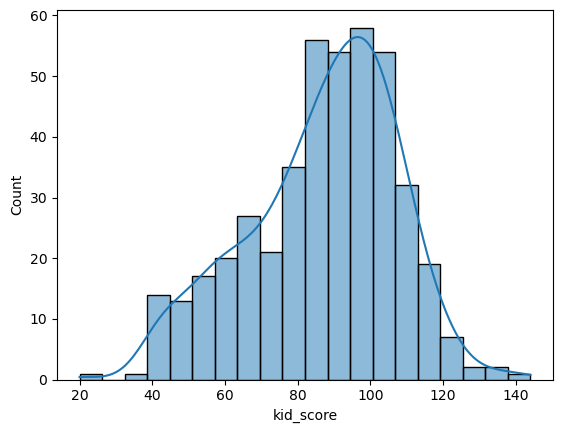

In [14]:
sns.histplot(kid_iq_1.kid_score,kde=True,bins=20)

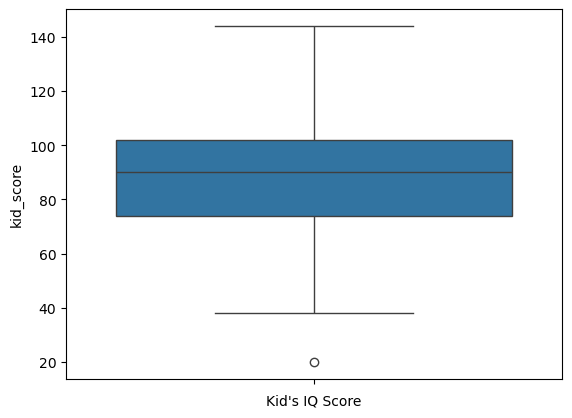

In [15]:
sns.boxplot(kid_iq_1.kid_score)
plt.xlabel("Kid's IQ Score")
plt.show()

#### There seems to be an outlier i.e., IQ=20.

#### For now, since the numbers of outliers is minimal let's keep the outlier and proceed to model building.

#### Mom's IQ was seemed to have a linear relationship with the Kid's IQ. So let's plot a correlation plot and then we would use a simple ordinary least square method with Mom's IQ vs Kid's IQ to evaluate Linear Regression performance against the Multiple Linear Regression.

<Axes: >

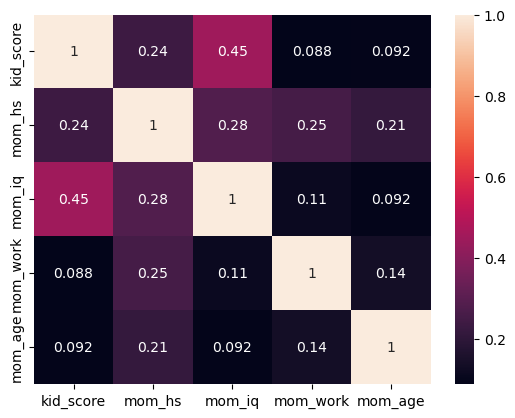

In [16]:
sns.heatmap(kid_iq_1.corr(),annot=True)

In [17]:
model_momiq=sm.OLS.from_formula("kid_score~mom_iq",data=kid_iq_1).fit()
print(model_momiq.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           7.66e-23
Time:                        23:25:33   Log-Likelihood:                -1875.6
No. Observations:                 434   AIC:                             3755.
Df Residuals:                     432   BIC:                             3763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7998      5.917      4.360      0.0

#### Although the explained variance is only 20.1% from the Mother's IQ in predicting their children's IQ, the p-value is significant since (𝑝<0.001) and suggests linearity.

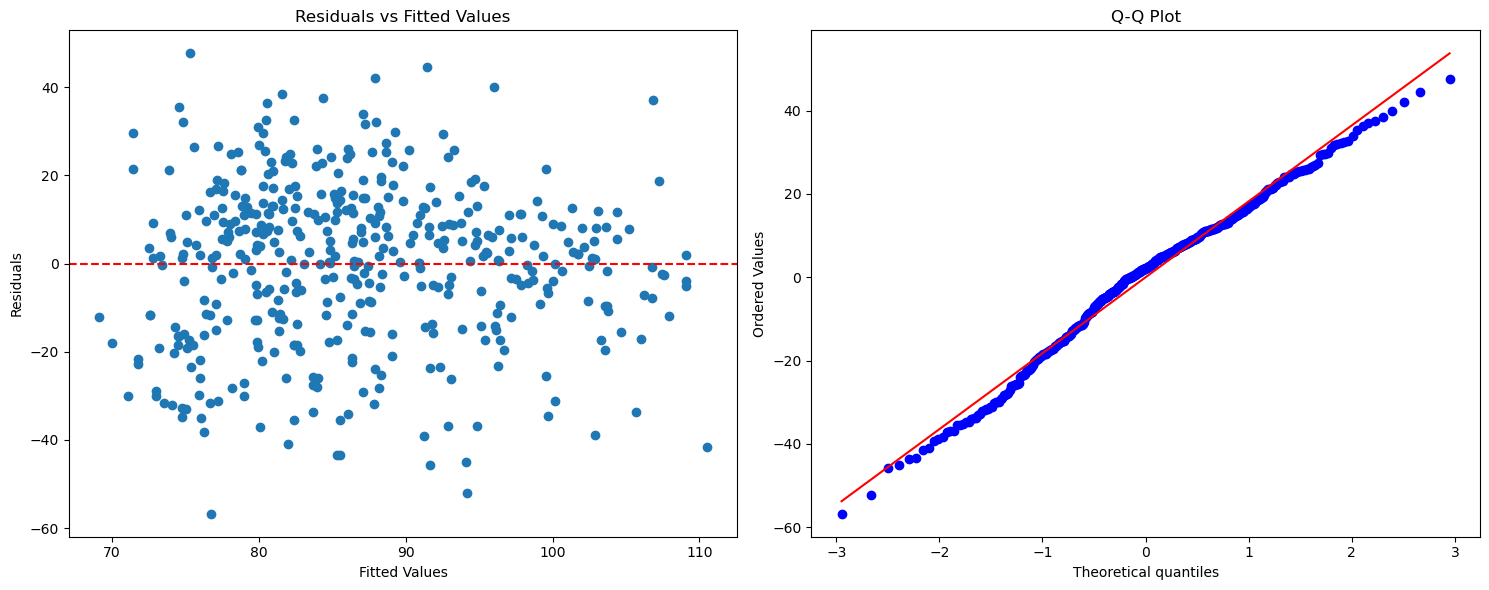

In [28]:
import scipy.stats as stats
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.scatter(model_momiq.fittedvalues, model_momiq.resid)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_xlabel("Fitted Values")
ax1.set_ylabel("Residuals")
ax1.set_title("Residuals vs Fitted Values")
stats.probplot(model_momiq.resid, dist="norm", plot=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()

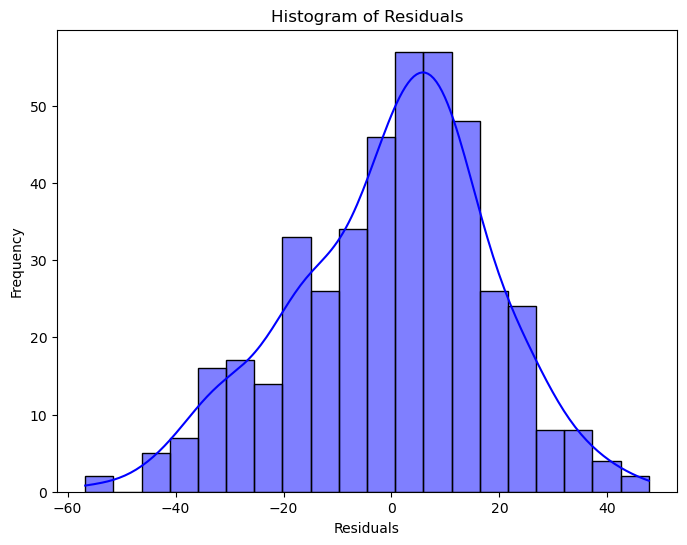

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(model_momiq.resid, kde=True, bins=20, color='blue')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

#### Now let's try out with the multiple variables.

In [18]:
model_mlr=sm.OLS.from_formula('kid_score~C(mom_hs)+mom_iq+C(mom_work)+mom_age',data=kid_iq_1).fit()
print(model_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     20.22
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           7.55e-21
Time:                        23:25:33   Log-Likelihood:                -1870.0
No. Observations:                 434   AIC:                             3754.
Df Residuals:                     427   BIC:                             3783.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           20.2727      9.393  

#### Only 2% of the explained variance seems to be increase when we use the other predictors and out of them only 'mom_iq' and 'mom_hs' who have passed high school is significant with (𝑝<0.001). We can also interpret the importance of the features from here.

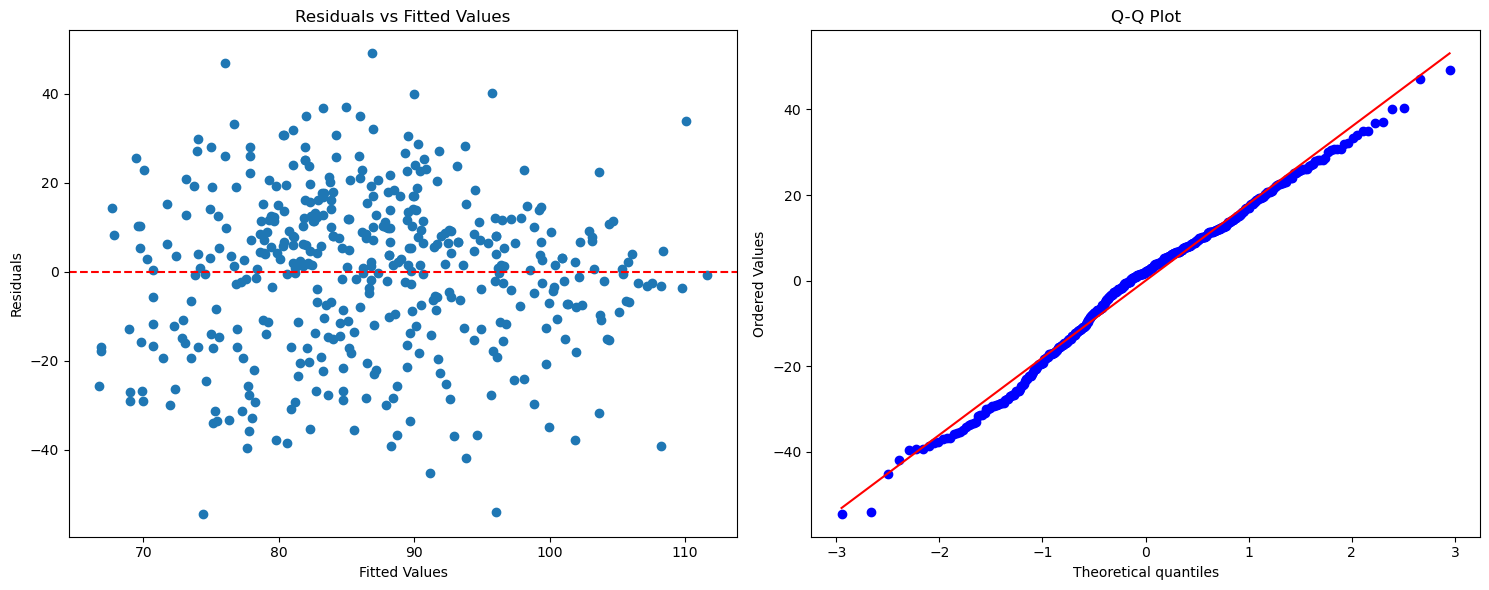

In [30]:
import scipy.stats as stats
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.scatter(model_mlr.fittedvalues, model_mlr.resid)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_xlabel("Fitted Values")
ax1.set_ylabel("Residuals")
ax1.set_title("Residuals vs Fitted Values")
stats.probplot(model_mlr.resid, dist="norm", plot=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()

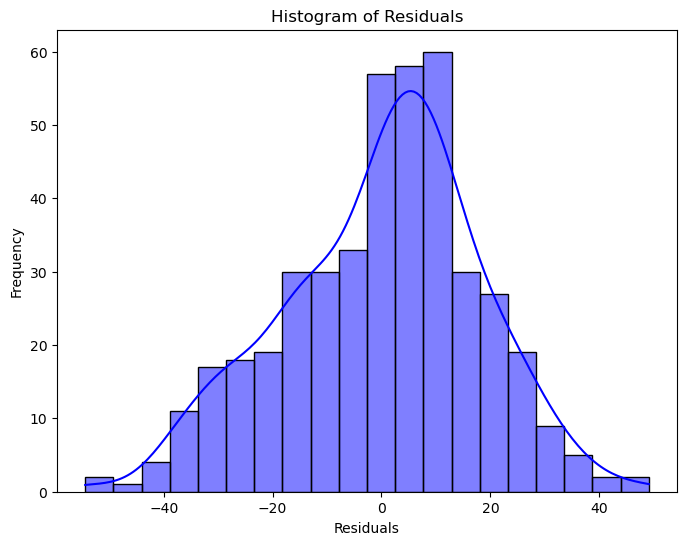

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(model_mlr.resid, kde=True, bins=20, color='blue')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

#### Assumptions of Linear models are followed with the exception of Linearity.

#### Now let's try out a bunch of other models. But at first let's perform some preprocessing steps.

#### One-hot encode the categorical i.e., 'mom_hs' and 'mom_work' variable.

In [19]:
dummies_hs=pd.get_dummies(kid_iq_1.mom_hs,dtype='int64',drop_first=True)
dummies_hs.columns=[f'hs{i+1}' for i in range(dummies_hs.shape[1])]
dummies_hs.head()

,hs1
0,1
1,1
2,1
3,1
4,1


In [20]:
dummies_work=pd.get_dummies(kid_iq_1.mom_work,dtype='int64',drop_first=True)
dummies_work.columns=[f'work{i+1}' for i in range(dummies_work.shape[1])]
dummies_work.head()

,work1,work2,work3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1


In [21]:
kid_iq_2=pd.concat([kid_iq_1.drop(['mom_hs','mom_work'],axis='columns'),dummies_hs,dummies_work],axis='columns')
kid_iq_2.head()

,kid_score,mom_iq,mom_age,hs1,work1,work2,work3
0,65,121.117529,27,1,0,0,1
1,98,89.361882,25,1,0,0,1
2,85,115.443165,27,1,0,0,1
3,83,99.449639,25,1,0,1,0
4,115,92.745710,27,1,0,0,1


#### Partition the data into x and y then perform scaling on 'mom_age' and 'mom_iq'. 

In [22]:
x=kid_iq_2.drop('kid_score',axis='columns')
y=kid_iq_2['kid_score']

In [23]:
from sklearn.preprocessing import MinMaxScaler
int_columns = x.select_dtypes(include=['int','float']).columns
binary_columns = [col for col in int_columns if x[col].nunique() == 2]
int_only_columns = [col for col in int_columns if col not in binary_columns]
scaler = MinMaxScaler()
x[int_only_columns] = scaler.fit_transform(x[int_only_columns])
print(x)

       mom_iq   mom_age  hs1  work1  work2  work3
0    0.738039  0.833333    1      0      0      1
1    0.270051  0.666667    1      0      0      1
2    0.654415  0.833333    1      0      0      1
3    0.418716  0.666667    1      0      1      0
4    0.319919  0.833333    1      0      0      1
..        ...       ...  ...    ...    ...    ...
429  0.203962  0.333333    0      0      0      1
430  0.323525  0.500000    1      0      0      1
431  0.351073  0.583333    0      1      0      0
432  0.380502  0.333333    1      1      0      0
433  0.297925  0.666667    1      1      0      0

[434 rows x 6 columns]


#### Let's try out the 'feature_importance' function from the Random Forest module. 

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x, y)
importances = rf.feature_importances_
feature_names = x.columns
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance}")

mom_iq: 0.6601240199268944
mom_age: 0.1961332324121028
hs1: 0.037067703534723204
work1: 0.03784310356799707
work2: 0.019360278317804586
work3: 0.049471662240478144


#### The variable 'mom_iq' has the strongest influence on the outcome, explaining approximately 66% of the variance in predictions, surprisingly followed by 'mom_age' at about 20% (maybe becuase of the preprocessing step🤔). The remaining variables ('hs1', 'work1', 'work2', 'work3') contribute minimally, each explaining less than 5% of the variance.

#### Now let's try out a bunch of other models using Grid Search CV.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1, 10],
                'solver': ['auto', 'svd', 'cholesky']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100],
                'criterion': ['squared_error', 'absolute_error']
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5]
            }
        },
        'svr': {
            'model': SVR(),
            'params': {
                'kernel': ['linear', 'poly', 'rbf'],
                'C': [1, 10],
                'gamma': ['scale', 'auto']
            }
        },
        'kernel_ridge': {
            'model': KernelRidge(),
            'params': {
                'alpha': [0.1, 1, 10],
                'kernel': ['linear', 'rbf', 'poly']
            }
        },
        'mlp': {
            'model': MLPRegressor(max_iter=500),
            'params': {
                'hidden_layer_sizes': [(50,), (100,)],
                'activation': ['relu', 'tanh'],
                'solver': ['adam', 'sgd']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [37]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.152283,{'fit_intercept': True}
1,lasso,0.139748,"{'alpha': 1, 'selection': 'cyclic'}"
2,ridge,0.156482,"{'alpha': 1, 'solver': 'auto'}"
3,decision_tree,-0.467269,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
4,random_forest,0.076837,"{'criterion': 'absolute_error', 'n_estimators'..."
5,gradient_boosting,0.140215,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."
6,svr,0.145787,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}"
7,kernel_ridge,0.169650,"{'alpha': 0.1, 'kernel': 'rbf'}"
8,mlp,0.179107,"{'activation': 'tanh', 'hidden_layer_sizes': (..."


#### Although the best_scores looks horrible let's try out with the 'Kernel Ridge Regressor' which performed better than any other models. (We would not be using mlp)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,shuffle=True,random_state=44)

In [39]:
from sklearn.kernel_ridge import KernelRidge
model_kr=KernelRidge(alpha=0.1,kernel='rbf')
model_kr.fit(x_train,y_train)

KernelRidge(alpha=0.1, kernel='rbf')

In [40]:
y_pred_kr=model_kr.predict(x_test)

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred_kr)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred_kr)
r2 = r2_score(y_test, y_pred_kr)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 230.58
Root Mean Squared Error (RMSE): 15.18
Mean Absolute Error (MAE): 11.77
R-squared (R²): 0.36


#### This is the best model with the highest explained variance of 36% from the predictors. Maybe we need more influential variables which can minimize the variation around the loss.